In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Test instance 1: ['Rain', 'Cool', 'Normal', 'Strong']
Predicted label: No
Test instance 2: ['Sunny', 'Mild', 'Normal', 'Strong']
Predicted label: Yes


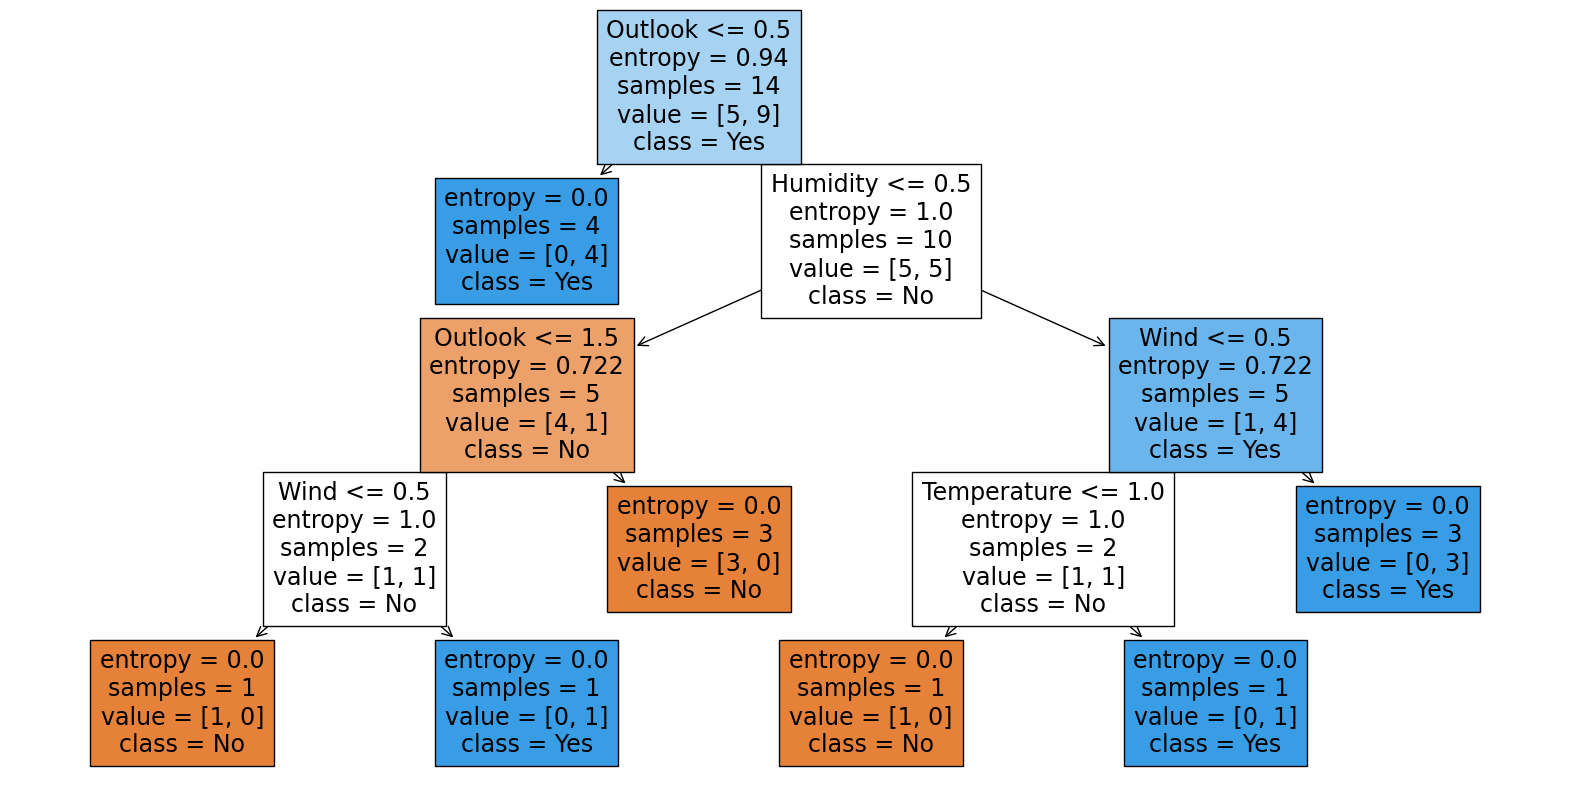

In [16]:
# Load data
data = pd.read_csv('data.csv')
x = data.drop('PlayTennis', axis=1)
y = data['PlayTennis']

# Encode categorical features
label_encoders = {}
for column in x.columns:
    label_encoders[column] = LabelEncoder()
    x[column] = label_encoders[column].fit_transform(x[column])
label_encoders['PlayTennis'] = LabelEncoder()
y = label_encoders['PlayTennis'].fit_transform(y)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x, y)

# New samples for prediction
new_samples = [
    {'Outlook': 'Rain', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Wind': 'Strong'},
    {'Outlook': 'Sunny', 'Temperature': 'Mild', 'Humidity': 'Normal', 'Wind': 'Strong'}
]

# Predict and print results
for i, new_sample in enumerate(new_samples, 1):
    new_sample_encoded = [label_encoders[column].transform([new_sample[column]])[0] for column in x.columns]
    prediction = clf.predict([new_sample_encoded])
    prediction_decoded = label_encoders['PlayTennis'].inverse_transform(prediction)
    print(f"Test instance {i}: {list(new_sample.values())}")
    print(f"Predicted label: {prediction_decoded[0]}")

# Plot and display the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=x.columns, class_names=label_encoders['PlayTennis'].classes_, filled=True)
plt.show()
